In [1]:
import pandas as pd
import re
import os
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from lets_plot import *
LetsPlot.setup_html()

In [2]:
df = pd.read_csv("../data/project.csv")

In [3]:
df

,Unnamed: 0,Name,Wins,Lose,Draw,Total_Matches,Division,Win_streak,Knock_out,Submission,Decisions,Striking_accuracy,Takedown_accuracy,Age,Knockdown_avg,Average_fight_time,Height_in_inches,Weight_in_pounds,Debut,Country
0,0,Islam Makhachev,27,1,0,28,Lightweight Division,15,5,13.0,9.0,59%,54%,33.0,0.35,10:12\n,70.0,154.5,"May. 23, 2015",Russia
1,1,Brandon Royval,17,7,0,24,Flyweight Division,4,9,10.0,4.0,40%,75%,32.0,0.37,12:01\n,69.0,125.5,"May. 30, 2020",United States
2,2,Sean O'Malley,18,2,0,20,Bantamweight Division,12,9,NaN,5.0,61%,43%,30.0,0.77,11:04\n,71.0,135.0,"Jul. 18, 2017",United States
3,3,Alexander Volkanovski,26,4,0,30,Featherweight Division,13,3,7.0,9.0,57%,38%,36.0,0.36,15:49\n,66.0,144.5,"Oct. 15, 2016",Australia
4,4,Arman Tsarukyan,22,3,0,25,Lightweight Division,9,5,8.0,8.0,49%,37%,28.0,0.32,12:36\n,67.0,170.0,"Apr. 20, 2019",Georgia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,203,Kennedy Nzechukwu,14,5,0,19,Heavyweight Division,10,4,NaN,3.0,47%,45%,32.0,0.45,08:57\n,77.0,236.5,"Aug. 22, 2017",United States
204,204,Maycee Barber,14,2,0,16,Women's Flyweight Division,6,6,2.0,5.0,53%,44%,26.0,0.00,12:10\n,65.0,125.0,"Nov. 10, 2018",United States
205,205,Tecia Pennington,14,7,0,21,Women's Strawweight Division,1,1,NaN,12.0,48%,14%,35.0,0.06,13:53\n,61.0,115.0,"Dec. 12, 2014",United States
206,206,Mayra Bueno Silva,10,5,1,16,Women's Flyweight Division,1,7,7.0,2.0,59%,29%,33.0,0.00,10:10\n,66.0,126.0,"Sep. 23, 2018",Brazil


In [4]:
df['Country'].nunique()

39

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.drop_duplicates(subset=['Name','Division','Country'],keep='last')


,Unnamed: 0,Name,Wins,Lose,Draw,Total_Matches,Division,Win_streak,Knock_out,Submission,Decisions,Striking_accuracy,Takedown_accuracy,Age,Knockdown_avg,Average_fight_time,Height_in_inches,Weight_in_pounds,Debut,Country
0,0,Islam Makhachev,27,1,0,28,Lightweight Division,15,5,13.0,9.0,59%,54%,33.0,0.35,10:12\n,70.0,154.5,"May. 23, 2015",Russia
1,1,Brandon Royval,17,7,0,24,Flyweight Division,4,9,10.0,4.0,40%,75%,32.0,0.37,12:01\n,69.0,125.5,"May. 30, 2020",United States
4,4,Arman Tsarukyan,22,3,0,25,Lightweight Division,9,5,8.0,8.0,49%,37%,28.0,0.32,12:36\n,67.0,170.0,"Apr. 20, 2019",Georgia
6,6,Nassourdine Imavov,16,4,0,20,Middleweight Division,7,4,7.0,5.0,56%,32%,29.0,0.19,14:23\n,75.0,185.0,"Oct. 3, 2020",Russia
9,9,Valentina Shevchenko,24,4,1,29,Women's Flyweight Division,8,7,6.0,9.0,53%,64%,37.0,0.05,18:22\n,65.0,125.0,"Dec. 19, 2015",Kyrgyzstan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,203,Kennedy Nzechukwu,14,5,0,19,Heavyweight Division,10,4,NaN,3.0,47%,45%,32.0,0.45,08:57\n,77.0,236.5,"Aug. 22, 2017",United States
204,204,Maycee Barber,14,2,0,16,Women's Flyweight Division,6,6,2.0,5.0,53%,44%,26.0,0.00,12:10\n,65.0,125.0,"Nov. 10, 2018",United States
205,205,Tecia Pennington,14,7,0,21,Women's Strawweight Division,1,1,NaN,12.0,48%,14%,35.0,0.06,13:53\n,61.0,115.0,"Dec. 12, 2014",United States
206,206,Mayra Bueno Silva,10,5,1,16,Women's Flyweight Division,1,7,7.0,2.0,59%,29%,33.0,0.00,10:10\n,66.0,126.0,"Sep. 23, 2018",Brazil


In [7]:
df = (df.rename(columns={'Unnamed: 0':'ID'}))

In [8]:
df.loc[df["Division"] == "Lightweight Division"]

,ID,Name,Wins,Lose,Draw,Total_Matches,Division,Win_streak,Knock_out,Submission,Decisions,Striking_accuracy,Takedown_accuracy,Age,Knockdown_avg,Average_fight_time,Height_in_inches,Weight_in_pounds,Debut,Country
0,0,Islam Makhachev,27,1,0,28,Lightweight Division,15,5,13.0,9.0,59%,54%,33.0,0.35,10:12\n,70.0,154.5,"May. 23, 2015",Russia
4,4,Arman Tsarukyan,22,3,0,25,Lightweight Division,9,5,8.0,8.0,49%,37%,28.0,0.32,12:36\n,67.0,170.0,"Apr. 20, 2019",Georgia
17,17,Charles Oliveira,35,10,0,45,Lightweight Division,10,21,NaN,4.0,55%,40%,35.0,0.46,07:38\n,70.0,155.6,"Aug. 1, 2010",Brazil
30,30,Justin Gaethje,27,5,0,32,Lightweight Division,20,9,NaN,6.0,59%,14%,36.0,0.67,11:14\n,71.0,156.0,"Jul. 8, 2017",United States
43,43,Justin Gaethje,27,5,0,32,Lightweight Division,20,9,NaN,6.0,59%,14%,36.0,0.67,11:14\n,71.0,156.0,"Jul. 8, 2017",United States
56,56,Dustin Poirier,30,9,0,39,Lightweight Division,16,7,13.0,7.0,51%,36%,36.0,0.62,10:17\n,69.0,155.0,"Jan. 2, 2011",United States
82,82,Dan Hooker,24,12,0,36,Lightweight Division,11,7,12.0,6.0,49%,34%,35.0,0.60,10:13\n,72.0,155.5,"Jun. 28, 2014",New Zealand
95,95,Michael Chandler,23,9,0,32,Lightweight Division,11,7,13.0,5.0,50%,37%,38.0,0.48,09:18\n,68.0,155.6,"Jan. 23, 2021",United States
108,108,Mateusz Gamrot,24,3,0,27,Lightweight Division,8,5,3.0,11.0,51%,35%,34.0,0.12,12:18\n,70.0,156.0,"Oct. 17, 2020",Poland
121,121,Beneil Dariush,22,6,1,29,Lightweight Division,5,8,8.0,9.0,49%,34%,35.0,0.51,08:54\n,70.0,167.0,"Jan. 15, 2014",Iran


In [9]:
df['ID']=df['ID'].astype('Int64')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  208 non-null    Int64  
 1   Name                208 non-null    object 
 2   Wins                208 non-null    int64  
 3   Lose                208 non-null    int64  
 4   Draw                208 non-null    int64  
 5   Total_Matches       208 non-null    int64  
 6   Division            208 non-null    object 
 7   Win_streak          208 non-null    int64  
 8   Knock_out           208 non-null    int64  
 9   Submission          173 non-null    float64
 10  Decisions           203 non-null    float64
 11  Striking_accuracy   207 non-null    object 
 12  Takedown_accuracy   203 non-null    object 
 13  Age                 199 non-null    float64
 14  Knockdown_avg       203 non-null    float64
 15  Average_fight_time  203 non-null    object 
 16  Height_i

In [11]:
df

,ID,Name,Wins,Lose,Draw,Total_Matches,Division,Win_streak,Knock_out,Submission,Decisions,Striking_accuracy,Takedown_accuracy,Age,Knockdown_avg,Average_fight_time,Height_in_inches,Weight_in_pounds,Debut,Country
0,0,Islam Makhachev,27,1,0,28,Lightweight Division,15,5,13.0,9.0,59%,54%,33.0,0.35,10:12\n,70.0,154.5,"May. 23, 2015",Russia
1,1,Brandon Royval,17,7,0,24,Flyweight Division,4,9,10.0,4.0,40%,75%,32.0,0.37,12:01\n,69.0,125.5,"May. 30, 2020",United States
2,2,Sean O'Malley,18,2,0,20,Bantamweight Division,12,9,NaN,5.0,61%,43%,30.0,0.77,11:04\n,71.0,135.0,"Jul. 18, 2017",United States
3,3,Alexander Volkanovski,26,4,0,30,Featherweight Division,13,3,7.0,9.0,57%,38%,36.0,0.36,15:49\n,66.0,144.5,"Oct. 15, 2016",Australia
4,4,Arman Tsarukyan,22,3,0,25,Lightweight Division,9,5,8.0,8.0,49%,37%,28.0,0.32,12:36\n,67.0,170.0,"Apr. 20, 2019",Georgia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,203,Kennedy Nzechukwu,14,5,0,19,Heavyweight Division,10,4,NaN,3.0,47%,45%,32.0,0.45,08:57\n,77.0,236.5,"Aug. 22, 2017",United States
204,204,Maycee Barber,14,2,0,16,Women's Flyweight Division,6,6,2.0,5.0,53%,44%,26.0,0.00,12:10\n,65.0,125.0,"Nov. 10, 2018",United States
205,205,Tecia Pennington,14,7,0,21,Women's Strawweight Division,1,1,NaN,12.0,48%,14%,35.0,0.06,13:53\n,61.0,115.0,"Dec. 12, 2014",United States
206,206,Mayra Bueno Silva,10,5,1,16,Women's Flyweight Division,1,7,7.0,2.0,59%,29%,33.0,0.00,10:10\n,66.0,126.0,"Sep. 23, 2018",Brazil


In [12]:
df['Submission'] = df['Submission'].fillna(0)

In [13]:
df['Decisions'] = df['Decisions'].fillna(0) 

In [14]:
df

,ID,Name,Wins,Lose,Draw,Total_Matches,Division,Win_streak,Knock_out,Submission,Decisions,Striking_accuracy,Takedown_accuracy,Age,Knockdown_avg,Average_fight_time,Height_in_inches,Weight_in_pounds,Debut,Country
0,0,Islam Makhachev,27,1,0,28,Lightweight Division,15,5,13.0,9.0,59%,54%,33.0,0.35,10:12\n,70.0,154.5,"May. 23, 2015",Russia
1,1,Brandon Royval,17,7,0,24,Flyweight Division,4,9,10.0,4.0,40%,75%,32.0,0.37,12:01\n,69.0,125.5,"May. 30, 2020",United States
2,2,Sean O'Malley,18,2,0,20,Bantamweight Division,12,9,0.0,5.0,61%,43%,30.0,0.77,11:04\n,71.0,135.0,"Jul. 18, 2017",United States
3,3,Alexander Volkanovski,26,4,0,30,Featherweight Division,13,3,7.0,9.0,57%,38%,36.0,0.36,15:49\n,66.0,144.5,"Oct. 15, 2016",Australia
4,4,Arman Tsarukyan,22,3,0,25,Lightweight Division,9,5,8.0,8.0,49%,37%,28.0,0.32,12:36\n,67.0,170.0,"Apr. 20, 2019",Georgia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,203,Kennedy Nzechukwu,14,5,0,19,Heavyweight Division,10,4,0.0,3.0,47%,45%,32.0,0.45,08:57\n,77.0,236.5,"Aug. 22, 2017",United States
204,204,Maycee Barber,14,2,0,16,Women's Flyweight Division,6,6,2.0,5.0,53%,44%,26.0,0.00,12:10\n,65.0,125.0,"Nov. 10, 2018",United States
205,205,Tecia Pennington,14,7,0,21,Women's Strawweight Division,1,1,0.0,12.0,48%,14%,35.0,0.06,13:53\n,61.0,115.0,"Dec. 12, 2014",United States
206,206,Mayra Bueno Silva,10,5,1,16,Women's Flyweight Division,1,7,7.0,2.0,59%,29%,33.0,0.00,10:10\n,66.0,126.0,"Sep. 23, 2018",Brazil


In [15]:
df['Gender'] = df['Division'].apply(lambda x : 'women' if 'women' in x.lower() else 'men')

In [16]:
df

,ID,Name,Wins,Lose,Draw,Total_Matches,Division,Win_streak,Knock_out,Submission,...,Striking_accuracy,Takedown_accuracy,Age,Knockdown_avg,Average_fight_time,Height_in_inches,Weight_in_pounds,Debut,Country,Gender
0,0,Islam Makhachev,27,1,0,28,Lightweight Division,15,5,13.0,...,59%,54%,33.0,0.35,10:12\n,70.0,154.5,"May. 23, 2015",Russia,men
1,1,Brandon Royval,17,7,0,24,Flyweight Division,4,9,10.0,...,40%,75%,32.0,0.37,12:01\n,69.0,125.5,"May. 30, 2020",United States,men
2,2,Sean O'Malley,18,2,0,20,Bantamweight Division,12,9,0.0,...,61%,43%,30.0,0.77,11:04\n,71.0,135.0,"Jul. 18, 2017",United States,men
3,3,Alexander Volkanovski,26,4,0,30,Featherweight Division,13,3,7.0,...,57%,38%,36.0,0.36,15:49\n,66.0,144.5,"Oct. 15, 2016",Australia,men
4,4,Arman Tsarukyan,22,3,0,25,Lightweight Division,9,5,8.0,...,49%,37%,28.0,0.32,12:36\n,67.0,170.0,"Apr. 20, 2019",Georgia,men
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,203,Kennedy Nzechukwu,14,5,0,19,Heavyweight Division,10,4,0.0,...,47%,45%,32.0,0.45,08:57\n,77.0,236.5,"Aug. 22, 2017",United States,men
204,204,Maycee Barber,14,2,0,16,Women's Flyweight Division,6,6,2.0,...,53%,44%,26.0,0.00,12:10\n,65.0,125.0,"Nov. 10, 2018",United States,women
205,205,Tecia Pennington,14,7,0,21,Women's Strawweight Division,1,1,0.0,...,48%,14%,35.0,0.06,13:53\n,61.0,115.0,"Dec. 12, 2014",United States,women
206,206,Mayra Bueno Silva,10,5,1,16,Women's Flyweight Division,1,7,7.0,...,59%,29%,33.0,0.00,10:10\n,66.0,126.0,"Sep. 23, 2018",Brazil,women


In [17]:
removed_column = df.pop('Gender')

df.insert(7,'Gender',removed_column)

In [18]:
df

,ID,Name,Wins,Lose,Draw,Total_Matches,Division,Gender,Win_streak,Knock_out,...,Decisions,Striking_accuracy,Takedown_accuracy,Age,Knockdown_avg,Average_fight_time,Height_in_inches,Weight_in_pounds,Debut,Country
0,0,Islam Makhachev,27,1,0,28,Lightweight Division,men,15,5,...,9.0,59%,54%,33.0,0.35,10:12\n,70.0,154.5,"May. 23, 2015",Russia
1,1,Brandon Royval,17,7,0,24,Flyweight Division,men,4,9,...,4.0,40%,75%,32.0,0.37,12:01\n,69.0,125.5,"May. 30, 2020",United States
2,2,Sean O'Malley,18,2,0,20,Bantamweight Division,men,12,9,...,5.0,61%,43%,30.0,0.77,11:04\n,71.0,135.0,"Jul. 18, 2017",United States
3,3,Alexander Volkanovski,26,4,0,30,Featherweight Division,men,13,3,...,9.0,57%,38%,36.0,0.36,15:49\n,66.0,144.5,"Oct. 15, 2016",Australia
4,4,Arman Tsarukyan,22,3,0,25,Lightweight Division,men,9,5,...,8.0,49%,37%,28.0,0.32,12:36\n,67.0,170.0,"Apr. 20, 2019",Georgia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,203,Kennedy Nzechukwu,14,5,0,19,Heavyweight Division,men,10,4,...,3.0,47%,45%,32.0,0.45,08:57\n,77.0,236.5,"Aug. 22, 2017",United States
204,204,Maycee Barber,14,2,0,16,Women's Flyweight Division,women,6,6,...,5.0,53%,44%,26.0,0.00,12:10\n,65.0,125.0,"Nov. 10, 2018",United States
205,205,Tecia Pennington,14,7,0,21,Women's Strawweight Division,women,1,1,...,12.0,48%,14%,35.0,0.06,13:53\n,61.0,115.0,"Dec. 12, 2014",United States
206,206,Mayra Bueno Silva,10,5,1,16,Women's Flyweight Division,women,1,7,...,2.0,59%,29%,33.0,0.00,10:10\n,66.0,126.0,"Sep. 23, 2018",Brazil


In [19]:
df['Country'] = df['Country']

In [20]:
df['Country'] = df['Country'].str.replace('\n            ','Nigeria')

In [21]:
df['Country'].unique()

array(['Russia', 'United States', 'Australia', 'Georgia', 'Jamaica',
       'Brazil', 'England', 'Kyrgyzstan', 'China', 'Mexico', 'Uzbekistan',
       'Czechia', 'France', 'Germany', 'Iraq', 'Nigeria', 'Poland',
       'New Zealand', 'South Africa', 'Japan', 'Austria', 'Angola',
       'Ecuador', 'Ireland', 'Moldova', 'Italy', 'Argentina',
       'Kazakhstan', 'Iran', 'Switzerland', 'Canada', 'Morocco',
       'Dominican Republic', 'Netherlands', 'Scotland', 'Chile', 'UK',
       'Panama'], dtype=object)

In [22]:
df

,ID,Name,Wins,Lose,Draw,Total_Matches,Division,Gender,Win_streak,Knock_out,...,Decisions,Striking_accuracy,Takedown_accuracy,Age,Knockdown_avg,Average_fight_time,Height_in_inches,Weight_in_pounds,Debut,Country
0,0,Islam Makhachev,27,1,0,28,Lightweight Division,men,15,5,...,9.0,59%,54%,33.0,0.35,10:12\n,70.0,154.5,"May. 23, 2015",Russia
1,1,Brandon Royval,17,7,0,24,Flyweight Division,men,4,9,...,4.0,40%,75%,32.0,0.37,12:01\n,69.0,125.5,"May. 30, 2020",United States
2,2,Sean O'Malley,18,2,0,20,Bantamweight Division,men,12,9,...,5.0,61%,43%,30.0,0.77,11:04\n,71.0,135.0,"Jul. 18, 2017",United States
3,3,Alexander Volkanovski,26,4,0,30,Featherweight Division,men,13,3,...,9.0,57%,38%,36.0,0.36,15:49\n,66.0,144.5,"Oct. 15, 2016",Australia
4,4,Arman Tsarukyan,22,3,0,25,Lightweight Division,men,9,5,...,8.0,49%,37%,28.0,0.32,12:36\n,67.0,170.0,"Apr. 20, 2019",Georgia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,203,Kennedy Nzechukwu,14,5,0,19,Heavyweight Division,men,10,4,...,3.0,47%,45%,32.0,0.45,08:57\n,77.0,236.5,"Aug. 22, 2017",United States
204,204,Maycee Barber,14,2,0,16,Women's Flyweight Division,women,6,6,...,5.0,53%,44%,26.0,0.00,12:10\n,65.0,125.0,"Nov. 10, 2018",United States
205,205,Tecia Pennington,14,7,0,21,Women's Strawweight Division,women,1,1,...,12.0,48%,14%,35.0,0.06,13:53\n,61.0,115.0,"Dec. 12, 2014",United States
206,206,Mayra Bueno Silva,10,5,1,16,Women's Flyweight Division,women,1,7,...,2.0,59%,29%,33.0,0.00,10:10\n,66.0,126.0,"Sep. 23, 2018",Brazil


In [23]:
div_unique = df['Division'].unique()
div_unique = pd.Series(div_unique)
div_unique_sort = div_unique.sort_values(ascending=True).reset_index(drop=True)
div_unique_sort

0             Bantamweight Division
1            Featherweight Division
2                Flyweight Division
3              Heavyweight Division
4        Light Heavyweight Division
5              Lightweight Division
6             Middleweight Division
7             Welterweight Division
8     Women's Bantamweight Division
9        Women's Flyweight Division
10     Women's Strawweight Division
dtype: object

In [24]:
div_rank = div_unique_sort.rank(ascending=True).astype(int)
div_rank

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
dtype: int64

In [25]:
divisions = pd.DataFrame({
    'division':div_unique_sort,
    'Division_id':div_rank
})
divisions

,division,Division_id
0,Bantamweight Division,1
1,Featherweight Division,2
2,Flyweight Division,3
3,Heavyweight Division,4
4,Light Heavyweight Division,5
5,Lightweight Division,6
6,Middleweight Division,7
7,Welterweight Division,8
8,Women's Bantamweight Division,9
9,Women's Flyweight Division,10


In [26]:
country_unique = df['Country'].unique()
country_unique = pd.Series(country_unique)
country_unique_sort = country_unique.sort_values(ascending=True).reset_index(drop=True)

In [27]:
country_rank = country_unique_sort.rank(ascending=True).astype(int)

In [28]:
countries = pd.DataFrame({
    'country_name':country_unique_sort,
    'Country_id':country_rank
})
countries

,country_name,Country_id
0,Angola,1
1,Argentina,2
2,Australia,3
3,Austria,4
4,Brazil,5
5,Canada,6
6,Chile,7
7,China,8
8,Czechia,9
9,Dominican Republic,10


In [29]:
gender_name = df['Gender'].unique()
gender_name =pd.Series(gender_name)
gender_rank = gender_name.rank().astype(int)

In [30]:
gender = pd.DataFrame({
    'gender':gender_name,
    'Gender_id':gender_rank
})
gender

,gender,Gender_id
0,men,1
1,women,2


In [31]:
df['Gender']=df['Gender'].replace({
    'men':1,
    'women':2
})

C:\Users\akira\AppData\Local\Temp\ipykernel_12880\441670263.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender']=df['Gender'].replace({


In [32]:
country_map=countries.set_index("country_name")['Country_id'].to_dict()
df_country=df['Country'].map(country_map)
df.drop(columns=['Country'],inplace=True)

In [33]:
div_map = divisions.set_index("division")['Division_id'].to_dict()
df_div = df['Division'].map(div_map)
df = df.drop(columns=['Division'])

In [34]:
df.insert(6,'Division_id',df_div)
df.insert(7,'Country_id',df_country)

In [35]:
df['Striking_accuracy'] = df['Striking_accuracy'].str.rstrip('%').astype('Int64')
df['Takedown_accuracy'] = df['Takedown_accuracy'].str.rstrip('%').astype('Int64')
df['Average_fight_time'] = df['Average_fight_time'].str.strip()

In [36]:
df.rename(columns={'Gender':'Gender_id'},inplace=True)
df

,ID,Name,Wins,Lose,Draw,Total_Matches,Division_id,Country_id,Gender_id,Win_streak,...,Submission,Decisions,Striking_accuracy,Takedown_accuracy,Age,Knockdown_avg,Average_fight_time,Height_in_inches,Weight_in_pounds,Debut
0,0,Islam Makhachev,27,1,0,28,6,32,1,15,...,13.0,9.0,59,54,33.0,0.35,10:12,70.0,154.5,"May. 23, 2015"
1,1,Brandon Royval,17,7,0,24,3,37,1,4,...,10.0,4.0,40,75,32.0,0.37,12:01,69.0,125.5,"May. 30, 2020"
2,2,Sean O'Malley,18,2,0,20,1,37,1,12,...,0.0,5.0,61,43,30.0,0.77,11:04,71.0,135.0,"Jul. 18, 2017"
3,3,Alexander Volkanovski,26,4,0,30,2,3,1,13,...,7.0,9.0,57,38,36.0,0.36,15:49,66.0,144.5,"Oct. 15, 2016"
4,4,Arman Tsarukyan,22,3,0,25,6,14,1,9,...,8.0,8.0,49,37,28.0,0.32,12:36,67.0,170.0,"Apr. 20, 2019"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,203,Kennedy Nzechukwu,14,5,0,19,4,37,1,10,...,0.0,3.0,47,45,32.0,0.45,08:57,77.0,236.5,"Aug. 22, 2017"
204,204,Maycee Barber,14,2,0,16,10,37,2,6,...,2.0,5.0,53,44,26.0,0.00,12:10,65.0,125.0,"Nov. 10, 2018"
205,205,Tecia Pennington,14,7,0,21,11,37,2,1,...,0.0,12.0,48,14,35.0,0.06,13:53,61.0,115.0,"Dec. 12, 2014"
206,206,Mayra Bueno Silva,10,5,1,16,10,5,2,1,...,7.0,2.0,59,29,33.0,0.00,10:10,66.0,126.0,"Sep. 23, 2018"


In [37]:
df.columns

Index(['ID', 'Name', 'Wins', 'Lose', 'Draw', 'Total_Matches', 'Division_id',
       'Country_id', 'Gender_id', 'Win_streak', 'Knock_out', 'Submission',
       'Decisions', 'Striking_accuracy', 'Takedown_accuracy', 'Age',
       'Knockdown_avg', 'Average_fight_time', 'Height_in_inches',
       'Weight_in_pounds', 'Debut'],
      dtype='object')

In [38]:
df.describe()

,ID,Wins,Lose,Draw,Total_Matches,Division_id,Country_id,Gender_id,Win_streak,Knock_out,Submission,Decisions,Striking_accuracy,Takedown_accuracy,Age,Knockdown_avg,Height_in_inches,Weight_in_pounds
count,208.0,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,207.0,203.0,199.000000,203.000000,206.000000,206.000000
mean,103.5,18.586538,4.846154,0.153846,23.586538,6.129808,22.807692,1.307692,7.730769,5.774038,6.163462,6.144231,50.125604,42.08867,32.879397,0.496995,69.349515,153.841748
std,60.188592,6.000178,3.388726,0.399740,8.440311,3.255241,13.687031,0.462652,4.772568,3.872597,4.764220,3.447097,6.83606,16.159539,3.522730,0.982888,4.378069,44.911883
min,0.0,6.000000,0.000000,0.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,35.0,0.0,23.000000,0.000000,61.000000,35.000000
25%,51.75,14.000000,2.000000,0.000000,18.000000,3.000000,5.750000,1.000000,4.000000,3.000000,2.750000,4.000000,46.0,32.5,31.000000,0.120000,66.000000,125.500000
50%,103.5,17.000000,4.000000,0.000000,22.000000,6.000000,28.000000,1.000000,7.000000,5.000000,6.000000,6.000000,50.0,42.0,33.000000,0.340000,69.000000,144.500000
75%,155.25,22.000000,7.000000,0.000000,28.250000,9.000000,37.000000,2.000000,11.000000,8.000000,9.000000,9.000000,54.0,50.0,35.000000,0.585000,72.000000,171.000000
max,207.0,38.000000,21.000000,2.000000,59.000000,11.000000,38.000000,2.000000,27.000000,21.000000,23.000000,18.000000,67.0,100.0,42.000000,11.840000,79.000000,266.000000


In [39]:
df['ID'].describe()

count        208.0
mean         103.5
std      60.188592
min            0.0
25%          51.75
50%          103.5
75%         155.25
max          207.0
Name: ID, dtype: Float64

In [40]:
df['Name'].describe()

count              208
unique             173
top       Max Holloway
freq                 3
Name: Name, dtype: object

In [41]:
df['Wins'].describe()

count    208.000000
mean      18.586538
std        6.000178
min        6.000000
25%       14.000000
50%       17.000000
75%       22.000000
max       38.000000
Name: Wins, dtype: float64

In [42]:
df['Lose'].describe()

count    208.000000
mean       4.846154
std        3.388726
min        0.000000
25%        2.000000
50%        4.000000
75%        7.000000
max       21.000000
Name: Lose, dtype: float64

In [43]:
df['Draw'].describe()

count    208.000000
mean       0.153846
std        0.399740
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        2.000000
Name: Draw, dtype: float64

In [44]:
df['Total_Matches'].describe()

count    208.000000
mean      23.586538
std        8.440311
min        8.000000
25%       18.000000
50%       22.000000
75%       28.250000
max       59.000000
Name: Total_Matches, dtype: float64

In [45]:
conn=sqlite3.connect(os.path.join("UFC.db"))

In [46]:
df.to_sql("Players",conn, if_exists='replace', index=False)

208

In [47]:
countries.to_sql("Countries",conn, if_exists='replace', index=False)

38

In [48]:
divisions.to_sql("Divisions",conn, if_exists='replace', index=False)

11

In [49]:
gender.to_sql("Gender",conn, if_exists='replace', index=False)

2

In [50]:
ufc=conn.execute(
    '''
    Select p.ID,p.Name,p.Wins,p.Lose,p.Draw,p.Total_Matches,d.division
          ,c.country_name,g.gender,p.Win_streak,p.Knock_out,p.Submission,p.Decisions,p.Striking_accuracy
          ,p.Takedown_accuracy,p.Age,p.Knockdown_avg,p.Average_fight_time,p.Height_in_inches
          ,p.Weight_in_pounds,p.Debut        
    from Players p
    left join Countries c on p.Country_id = c.Country_id
    left join Divisions d on p.Division_id = d.Division_id
    left join Gender g on p.Gender_id=g.Gender_id
    
                 ''').fetchall()

In [51]:
ufc

[(0,
  'Islam Makhachev',
  27,
  1,
  0,
  28,
  'Lightweight Division',
  'Russia',
  'men',
  15,
  5,
  13.0,
  9.0,
  59,
  54,
  33.0,
  0.35,
  '10:12',
  70.0,
  154.5,
  'May. 23, 2015'),
 (1,
  'Brandon Royval',
  17,
  7,
  0,
  24,
  'Flyweight Division',
  'United States',
  'men',
  4,
  9,
  10.0,
  4.0,
  40,
  75,
  32.0,
  0.37,
  '12:01',
  69.0,
  125.5,
  'May. 30, 2020'),
 (2,
  "Sean O'Malley",
  18,
  2,
  0,
  20,
  'Bantamweight Division',
  'United States',
  'men',
  12,
  9,
  0.0,
  5.0,
  61,
  43,
  30.0,
  0.77,
  '11:04',
  71.0,
  135.0,
  'Jul. 18, 2017'),
 (3,
  'Alexander Volkanovski',
  26,
  4,
  0,
  30,
  'Featherweight Division',
  'Australia',
  'men',
  13,
  3,
  7.0,
  9.0,
  57,
  38,
  36.0,
  0.36,
  '15:49',
  66.0,
  144.5,
  'Oct. 15, 2016'),
 (4,
  'Arman Tsarukyan',
  22,
  3,
  0,
  25,
  'Lightweight Division',
  'Georgia',
  'men',
  9,
  5,
  8.0,
  8.0,
  49,
  37,
  28.0,
  0.32,
  '12:36',
  67.0,
  170.0,
  'Apr. 20, 2019')

In [52]:
ufc_df=pd.DataFrame(ufc, columns=['ID','Name', 'Wins','Lose','Draw','Total_Matches', 'division', 'country_name','gender','Win_streak','Knock_out', 'Submission','Decisions','Striking_accuracy', 
                                 'Takedown_accuracy','Age','Knockdown_avg', 'Average_fight_time', 'Height_in_inches', 'Weight_in_pounds','Debut'])

In [53]:
ufc_df

,ID,Name,Wins,Lose,Draw,Total_Matches,division,country_name,gender,Win_streak,...,Submission,Decisions,Striking_accuracy,Takedown_accuracy,Age,Knockdown_avg,Average_fight_time,Height_in_inches,Weight_in_pounds,Debut
0,0,Islam Makhachev,27,1,0,28,Lightweight Division,Russia,men,15,...,13.0,9.0,59.0,54.0,33.0,0.35,10:12,70.0,154.5,"May. 23, 2015"
1,1,Brandon Royval,17,7,0,24,Flyweight Division,United States,men,4,...,10.0,4.0,40.0,75.0,32.0,0.37,12:01,69.0,125.5,"May. 30, 2020"
2,2,Sean O'Malley,18,2,0,20,Bantamweight Division,United States,men,12,...,0.0,5.0,61.0,43.0,30.0,0.77,11:04,71.0,135.0,"Jul. 18, 2017"
3,3,Alexander Volkanovski,26,4,0,30,Featherweight Division,Australia,men,13,...,7.0,9.0,57.0,38.0,36.0,0.36,15:49,66.0,144.5,"Oct. 15, 2016"
4,4,Arman Tsarukyan,22,3,0,25,Lightweight Division,Georgia,men,9,...,8.0,8.0,49.0,37.0,28.0,0.32,12:36,67.0,170.0,"Apr. 20, 2019"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,203,Kennedy Nzechukwu,14,5,0,19,Heavyweight Division,United States,men,10,...,0.0,3.0,47.0,45.0,32.0,0.45,08:57,77.0,236.5,"Aug. 22, 2017"
204,204,Maycee Barber,14,2,0,16,Women's Flyweight Division,United States,women,6,...,2.0,5.0,53.0,44.0,26.0,0.00,12:10,65.0,125.0,"Nov. 10, 2018"
205,205,Tecia Pennington,14,7,0,21,Women's Strawweight Division,United States,women,1,...,0.0,12.0,48.0,14.0,35.0,0.06,13:53,61.0,115.0,"Dec. 12, 2014"
206,206,Mayra Bueno Silva,10,5,1,16,Women's Flyweight Division,Brazil,women,1,...,7.0,2.0,59.0,29.0,33.0,0.00,10:10,66.0,126.0,"Sep. 23, 2018"


In [54]:
conn.commit()

In [55]:
conn.close()

In [85]:
ufc_df.to_csv("../data/ufc_cleaned.csv")

In [56]:
ufc_df.loc[ufc_df["division"] == "Lightweight Division"]

,ID,Name,Wins,Lose,Draw,Total_Matches,division,country_name,gender,Win_streak,...,Submission,Decisions,Striking_accuracy,Takedown_accuracy,Age,Knockdown_avg,Average_fight_time,Height_in_inches,Weight_in_pounds,Debut
0,0,Islam Makhachev,27,1,0,28,Lightweight Division,Russia,men,15,...,13.0,9.0,59.0,54.0,33.0,0.35,10:12,70.0,154.5,"May. 23, 2015"
4,4,Arman Tsarukyan,22,3,0,25,Lightweight Division,Georgia,men,9,...,8.0,8.0,49.0,37.0,28.0,0.32,12:36,67.0,170.0,"Apr. 20, 2019"
17,17,Charles Oliveira,35,10,0,45,Lightweight Division,Brazil,men,10,...,0.0,4.0,55.0,40.0,35.0,0.46,07:38,70.0,155.6,"Aug. 1, 2010"
30,30,Justin Gaethje,27,5,0,32,Lightweight Division,United States,men,20,...,0.0,6.0,59.0,14.0,36.0,0.67,11:14,71.0,156.0,"Jul. 8, 2017"
43,43,Justin Gaethje,27,5,0,32,Lightweight Division,United States,men,20,...,0.0,6.0,59.0,14.0,36.0,0.67,11:14,71.0,156.0,"Jul. 8, 2017"
56,56,Dustin Poirier,30,9,0,39,Lightweight Division,United States,men,16,...,13.0,7.0,51.0,36.0,36.0,0.62,10:17,69.0,155.0,"Jan. 2, 2011"
82,82,Dan Hooker,24,12,0,36,Lightweight Division,New Zealand,men,11,...,12.0,6.0,49.0,34.0,35.0,0.60,10:13,72.0,155.5,"Jun. 28, 2014"
95,95,Michael Chandler,23,9,0,32,Lightweight Division,United States,men,11,...,13.0,5.0,50.0,37.0,38.0,0.48,09:18,68.0,155.6,"Jan. 23, 2021"
108,108,Mateusz Gamrot,24,3,0,27,Lightweight Division,Poland,men,8,...,3.0,11.0,51.0,35.0,34.0,0.12,12:18,70.0,156.0,"Oct. 17, 2020"
121,121,Beneil Dariush,22,6,1,29,Lightweight Division,Iran,men,5,...,8.0,9.0,49.0,34.0,35.0,0.51,08:54,70.0,167.0,"Jan. 15, 2014"


In [57]:
ufc_df.columns

Index(['ID', 'Name', 'Wins', 'Lose', 'Draw', 'Total_Matches', 'division',
       'country_name', 'gender', 'Win_streak', 'Knock_out', 'Submission',
       'Decisions', 'Striking_accuracy', 'Takedown_accuracy', 'Age',
       'Knockdown_avg', 'Average_fight_time', 'Height_in_inches',
       'Weight_in_pounds', 'Debut'],
      dtype='object')

In [58]:
ufc_df.dtypes

ID                      int64
Name                   object
Wins                    int64
Lose                    int64
Draw                    int64
Total_Matches           int64
division               object
country_name           object
gender                 object
Win_streak              int64
Knock_out               int64
Submission            float64
Decisions             float64
Striking_accuracy     float64
Takedown_accuracy     float64
Age                   float64
Knockdown_avg         float64
Average_fight_time     object
Height_in_inches      float64
Weight_in_pounds      float64
Debut                  object
dtype: object

In [59]:
ufc_df['division'].describe()

count                            208
unique                            11
top       Women's Flyweight Division
freq                              27
Name: division, dtype: object

In [60]:
ufc_df['country_name'].describe()

count               208
unique               38
top       United States
freq                 69
Name: country_name, dtype: object

In [61]:
ufc_df['gender'].describe()

count     208
unique      2
top       men
freq      144
Name: gender, dtype: object

In [62]:
ufc_df['Win_streak'].describe()

count    208.000000
mean       7.730769
std        4.772568
min        1.000000
25%        4.000000
50%        7.000000
75%       11.000000
max       27.000000
Name: Win_streak, dtype: float64

In [63]:
ufc_df['Knock_out'].describe()

count    208.000000
mean       5.774038
std        3.872597
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       21.000000
Name: Knock_out, dtype: float64

In [64]:
ufc_df['Submission'].describe()

count    208.000000
mean       6.163462
std        4.764220
min        0.000000
25%        2.750000
50%        6.000000
75%        9.000000
max       23.000000
Name: Submission, dtype: float64

In [65]:
ufc_df['Decisions'].describe()

count    208.000000
mean       6.144231
std        3.447097
min        0.000000
25%        4.000000
50%        6.000000
75%        9.000000
max       18.000000
Name: Decisions, dtype: float64

In [66]:
ufc_df['Striking_accuracy'].describe()

count    207.000000
mean      50.125604
std        6.836060
min       35.000000
25%       46.000000
50%       50.000000
75%       54.000000
max       67.000000
Name: Striking_accuracy, dtype: float64

In [67]:
ufc_df['Takedown_accuracy'].describe()

count    203.000000
mean      42.088670
std       16.159539
min        0.000000
25%       32.500000
50%       42.000000
75%       50.000000
max      100.000000
Name: Takedown_accuracy, dtype: float64

In [68]:
ufc_df['Age'].describe()

count    199.000000
mean      32.879397
std        3.522730
min       23.000000
25%       31.000000
50%       33.000000
75%       35.000000
max       42.000000
Name: Age, dtype: float64

In [69]:
ufc_df['Knockdown_avg'].describe()

count    203.000000
mean       0.496995
std        0.982888
min        0.000000
25%        0.120000
50%        0.340000
75%        0.585000
max       11.840000
Name: Knockdown_avg, dtype: float64

In [70]:
ufc_df['Average_fight_time'].describe()

count       203
unique      146
top       12:57
freq          3
Name: Average_fight_time, dtype: object

In [71]:
ufc_df['Height_in_inches'].describe()

count    206.000000
mean      69.349515
std        4.378069
min       61.000000
25%       66.000000
50%       69.000000
75%       72.000000
max       79.000000
Name: Height_in_inches, dtype: float64

In [72]:
ufc_df['Weight_in_pounds'].describe()

count    206.000000
mean     153.841748
std       44.911883
min       35.000000
25%      125.500000
50%      144.500000
75%      171.000000
max      266.000000
Name: Weight_in_pounds, dtype: float64

In [73]:
ufc_df['Debut'].describe()

count               199
unique              134
top       Dec. 12, 2014
freq                  4
Name: Debut, dtype: object

In [74]:
(
    ggplot(ufc_df, aes(x='division', y='Wins', color='gender', size='Wins')) +
    geom_point(alpha=0.8,
               tooltips=layer_tooltips()
                   .line("Player: @Name")  
                   .line("Wins: @Wins")  
                   .line("Total Matches: @Total_Matches") 
                   .line("Height in inches: @Height_in_inches")
                   .line("Weight in pounds: @Weight_in_pounds")
                   .line("Division: @division")) +
    ggtitle("Wins by Division and Gender") +
    xlab("Division") + 
    ylab("Total Wins") +
    ggsize(1000,700)+
    scale_size(range=[2, 10]) +
    scale_color_manual(values=["#1f77b4", "#ff7f0e"]) +
    theme_light() +
    theme(
        axis_title=element_text(size=20),  # Adjust axis title size
        axis_text=element_text(size=12),   # Adjust overall axis text size
        axis_text_x=element_text(size=15, angle=35, hjust=1),  # Rotate and resize x-axis text
        axis_text_y=element_text(size=12)  # Resize y-axis text
    )
)

In [75]:

# Select a specific division (Change this to any division name)
selected_division = "Lightweight Division"  # Change this to any division you want

# Filter dataset for the chosen division
division_df = ufc_df[ufc_df['division'] == selected_division].sort_values(by='Lose').drop_duplicates('Name')

# Ensure that there are players in the dataset before plotting
if not division_df.empty:
    # Create the funnel chart
    plot = (
        ggplot(division_df, aes(x='Name', y='Lose', fill='Lose')) +
        geom_bar(stat="identity", alpha=0.8) +  # Funnel effect
        scale_fill_gradient(low="green", high="red") +  # Color gradient for effect
        coord_flip() +  # Flip for better readability
        ggtitle(f"Players with Least Losses in {selected_division}") +
        xlab("Player Name") +
        ylab("Number of Losses") +
        facet_wrap('division',ncol=2)+
        theme_minimal() +
        theme(
            axis_text_y=element_text(size=8),  # Smaller text for many players
            axis_text_x=element_text(size=10),
            axis_title=element_text(size=14)
        ) +
        ggsize(1200, 700)  # Adjust size
    )

    # Display the plot
    plot.show()
else:
    print(f"No data available for the division: {selected_division}")



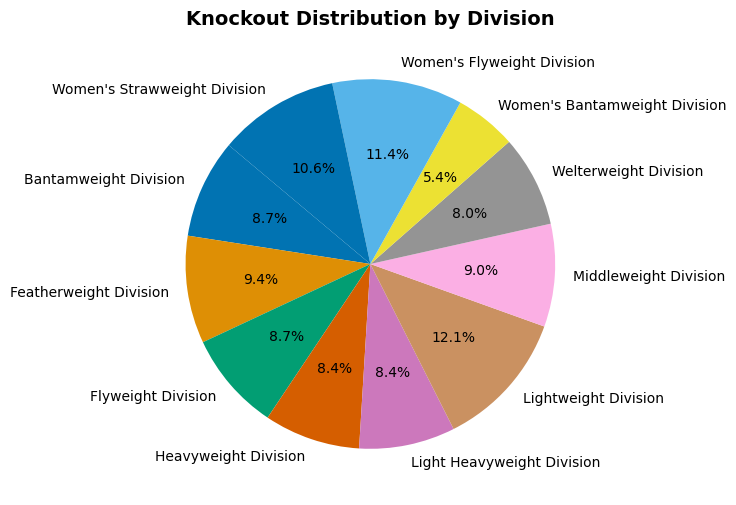

In [76]:
knockout_distribution = ufc_df.groupby('division')['Knock_out'].sum()



# Create the pie chart
plt.figure(figsize=(10, 6))
plt.pie(
    knockout_distribution, 
    labels=knockout_distribution.index, 
    autopct='%1.1f%%', 
    startangle=140,
    colors=sns.color_palette("colorblind"), 
)

# Title
plt.title("Knockout Distribution by Division", fontsize=14, fontweight='bold')

# Display chart
plt.show()

In [77]:
ko_df = ufc_df.sort_values(by='Knock_out', ascending=False).drop_duplicates('Name').head(20)

plot = (
    ggplot(ko_df) +
    geom_bar(aes(x='Knock_out', y='Name', fill='Knock_out'), stat="identity") +
    coord_flip() +
    ggtitle("Top 20 Fighters by Knockouts") +
    xlab("Fighter Name") +
    ylab("Knockouts") +
    scale_fill_gradient(low="blue", high="red") +
    theme_minimal() +
    ggsize(1000, 600)+
    theme_minimal() +
    theme(
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank()
    ) 
)
plot.show()


In [78]:
plot = (
    ggplot(ufc_df) +
    geom_point(aes(x='Height_in_inches', y='Weight_in_pounds', color='gender', size='Wins'), alpha=0.8,
               tooltips=layer_tooltips()
                   .line("Player: @Name")  
                   .line("Wins: @Wins")  
                   .line("Total Matches: @Total_Matches") 
                   .line("Height in inches: @Height_in_inches")
                   .line("Weight in pounds: @Weight_in_pounds")
                   .line("Division: @division")) +
    ggtitle("Height vs. Weight of Fighters") +
    scale_color_manual(values=["#9933ff", "#ff9900"]) +
    xlab("Height (inches)") +
    ylab("Weight (pounds)") +
    theme_light() +
    ggsize(900, 600)
)
plot.show()


In [79]:
plot = (
    ggplot(ufc_df) +
    geom_histogram(aes(x='Age', fill='gender'), bins=10, alpha=0.8, position="dodge") +
    ggtitle("Number of players Across Age Groups") +
    scale_fill_manual(values=["#7300e6", "#ff9900"])+
    xlab("Age") +
    ylab("Number of Fighters") +
    theme_minimal() +
    ggsize(1000, 600)+
    theme(panel_grid_major=element_blank(),panel_grid_minor=element_blank())
)
plot.show()


In [80]:

# Select the top 50 fighters with the least losses
top_50_fighters = ufc_df.nsmallest(50, 'Lose').drop_duplicates('Name')

# Create the donut chart using Plotly
fig = px.pie(
    top_50_fighters,
    values='Lose',  # Size of slices based on losses
    names='Name',  # Fighter names
    hole=0.4,  # Donut effect
    title="Top 50 Fighters with the Least Losses",
    color_discrete_sequence=px.colors.sequential.Plasma[::-1],  # Use a valid color sequence
)

fig.update_traces(
    textinfo='label',  # ✅ Show player names and percentages on the chart
    textfont_size=10,  # Adjust text size for better readability
    textposition='inside',
    hoverinfo='label+percent+value',  # Show name, percentage, and value on hover
    hovertemplate="<b>%{label}</b><br>Losses: %{value}"  # Format hover text
)

fig.update_layout(
    height=600,  # Increased figure height
    width=800,  # Increased figure width
    showlegend=True
)


# ✅ Fix: Open in browser instead of Jupyter
fig.show()


In [81]:

# Filter out rows with missing country data
fighters_by_country = ufc_df.dropna(subset=['country_name'])

# Create scatter plot
fig = px.scatter(
    fighters_by_country,
    x='Wins',  # Total Wins
    y='Knock_out',  # Total Knockouts
    color='country_name',  # Color by country
    size='Win_streak',  # Fighters with longer win streaks appear larger
    hover_name='Name',  # Show fighter names on hover
    title="UFC Fighters: Wins vs. Knockouts by Country",
    color_discrete_sequence=px.colors.qualitative.Set1,  # Use a distinct color set
)

# Customize layout
fig.update_layout(
    height=700,
    width=1000,
    xaxis=dict(showgrid=False), 
    yaxis=dict(showgrid=False),
    xaxis_title="Total Wins",
    yaxis_title="Total Knockouts",
    showlegend=True
)

# Show plot
fig.show()


In [82]:
# Select relevant columns and top 50 fighters with the least losses
top_50_fighters = ufc_df.sort_values(by='Wins', ascending=False).drop_duplicates('Name')

# Create an interactive scatter plot
fig = px.scatter(
    top_50_fighters,
    x='Submission',  # X-axis: Total Submissions
    y='Striking_accuracy',  # Y-axis: Striking Accuracy
    size='Win_streak',  # Bubble size represents Win Streak
    color='country_name',  # Color by country
    hover_name='Name',  # Show fighter names
    hover_data={  # Show additional details on hover
        'Submission': True,
        'Wins': True,
        'Knock_out': True,
        'Win_streak': True,
        'Striking_accuracy': True,
        'country_name': False,  # Don't repeat the country name
    },
    title="Striking accuracy vs. Submissions ",
    color_discrete_sequence=px.colors.qualitative.Dark24,  # Use a colorful set
)

# Increase figure size for better visibility
fig.update_layout(
    width=900,  # Increase width
    height=600,  # Increase height
    xaxis_title="Total Submission",
    yaxis_title="Striking accuracy",
    hovermode="closest",
    xaxis=dict(showgrid=False), 
    yaxis=dict(showgrid=False),
    template="plotly_dark",  # Dark theme
)

fig.show()


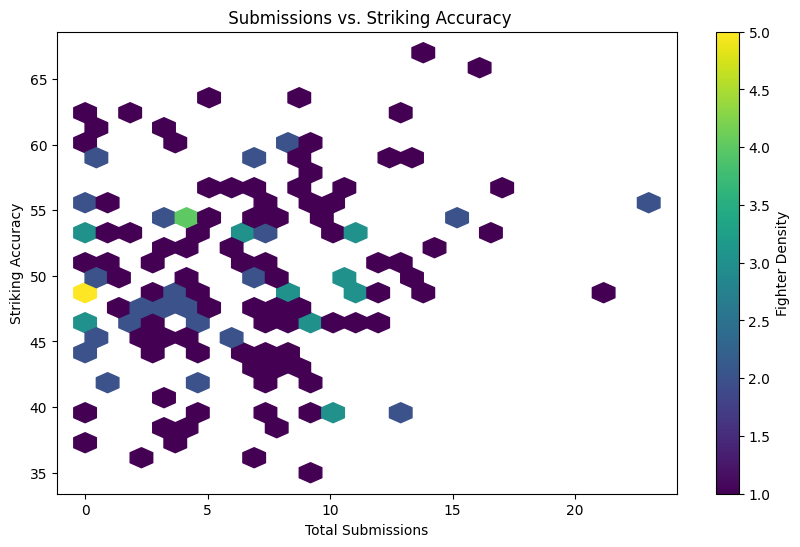

In [83]:
import matplotlib.pyplot as plt

# Define figure
plt.figure(figsize=(10, 6))

# Create hexbin plot
hb = plt.hexbin(
    top_50_fighters['Submission'], 
    top_50_fighters['Striking_accuracy'], 
    gridsize=25, 
    cmap='viridis',  # Use a color map
    mincnt=1
)

# Add color bar
plt.colorbar(label="Fighter Density")

# Labels and title
plt.xlabel("Total Submissions")
plt.ylabel("Striking Accuracy")
plt.title(" Submissions vs. Striking Accuracy")

# Show plot
plt.show()


In [84]:
import pandas as pd
import plotly.express as px

# Convert Debut to datetime and extract Year
ufc_df['Year'] = pd.to_datetime(ufc_df['Debut'], errors='coerce').dt.year

# Fill missing Year values with the earliest available year
ufc_df['Year'] = ufc_df['Year'].fillna(ufc_df['Year'].min()).astype(int)

# Drop missing country names
ufc_df= ufc_df.dropna(subset=['country_name'])

# Group by Year and Country, count all fighters (including duplicates)
country_trends = (
    ufc_df.groupby(['Year', 'country_name'])['Name'].count()
    .reset_index(name='Fighter Count')
)

# ✅ Ensure ALL countries appear in EVERY year, even with 0 fighters
all_years = list(range(ufc_df['Year'].min(), ufc_df['Year'].max() + 1))
all_countries = sorted(ufc_df['country_name'].unique())

full_index = pd.MultiIndex.from_product([all_years, all_countries], names=['Year', 'country_name'])
country_trends = (
    pd.DataFrame(index=full_index)
    .reset_index()
    .merge(country_trends, on=['Year', 'country_name'], how='left')
    .fillna({'Fighter Count': 0})
)

# Convert Fighter Count to integer
country_trends['Fighter Count'] = country_trends['Fighter Count'].astype(int)

# ✅ Ensure all countries are on the x-axis
country_trends['country_name'] = pd.Categorical(
    country_trends['country_name'], categories=all_countries, ordered=True
)

# Get maximum count for y-axis
max_fighters = country_trends["Fighter Count"].max()

# ✅ Create animated bar chart
fig = px.bar(
    country_trends,
    x="country_name",
    y="Fighter Count",
    color="country_name",
    animation_frame="Year",
    title="Number of UFC Fighters by Country Over Time",
    labels={"country_name": "Country", "Fighter Count": "Number of Fighters"},
    color_discrete_sequence=px.colors.qualitative.Bold
)

# ✅ Fix x-axis to keep all countries visible
fig.update_layout(
    xaxis=dict(
        categoryorder='array',
        categoryarray=all_countries,  # Ensures all countries appear
        tickmode='array',
        tickvals=list(range(len(all_countries))),
    ),
    yaxis=dict(range=[0, max_fighters + 5]),  # Fixed y-axis range
    yaxis_title="Number of Fighters",
    xaxis_title="Country",
    template="plotly_dark",
    width=1000,
    height=600
)

fig.show()
